In [1]:
from google.colab import drive
drive.mount("MyDrive")
%cd "MyDrive/MyDrive/NLP/Project"

Mounted at MyDrive
/content/MyDrive/MyDrive/NLP/Project


In [2]:
! ls

 2005.06557v2.pdf      'NLP Final Task.pdf'  'NLP_Project(1)_DataFetch.ipynb'
 dialects_database.db  'NLP Final Task.rar'   text_and_dialect.csv


In [27]:
! pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.3 MB/s eta 0:00:00


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import emoji
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 1000)

In [16]:
df = pd.read_csv('text_and_dialect.csv', encoding='utf-8', engine='python')
df.head()

,text,dialect
0,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو اختهم او قريبتهم تتعاكس تقولي عليهم من نشاط حقوق المرأة من ردة فعلهم.,LY
1,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ليا انا ميليشياوي زمان وتوة,LY
2,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بيرتاح لبنت مختلفة ويلاحظ انها غير كل البنات وبيحس كأنه يعرفها من زمان. بعدين يتزوج وحدة منهن وممكن اثنين ولاثلاثة وتنقلب الرومانسية لعياط وشياط وتهزيب\nand they live happily ever after\nذي اند,LY
3,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا الانسان يلي يحتاج اهل يخاف منهم علشان يكون محترم هو انسان قليل الادب اصلاً. ثانياً شن ذنب يلي معندهش اب ولا ام ولا خوت ولا خوات؟ يعني اليتيمة متستحقش تتزوج؟ وثالثاً ليش البنت هي بس لازم ادير الف حساب للراجل؟ هي متستحقش يندارلها الف حساب ولا هي عبدة؟,LY
4,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ازوج بنت يتيمة ولا بنت معندهش خوت. هدي اعصابك وفكينا من التخلف امتاعك,LY


# Check Data Balance :

In [8]:
df_len = len(df)
df_len

147734

In [14]:
for dialect, count in df['dialect'].value_counts().items():
    print(f"Dialect: {dialect} represents {100 * count / df_len:.2f}% of the total dataset")

Dialect: EG represents 39.01% of the total dataset
Dialect: LY represents 24.71% of the total dataset
Dialect: LB represents 18.69% of the total dataset
Dialect: SD represents 9.77% of the total dataset
Dialect: MA represents 7.81% of the total dataset


` !! Imbalanced Data`

In [18]:
df.isna().sum()

text       0
dialect    9
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
X_train, X_other, y_train, y_other = train_test_split(df['text'], df['dialect'], test_size=0.2, shuffle=True, stratify=df['dialect'], random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, shuffle=True, stratify=y_other, random_state=123)

In [21]:
print(len(X_train))
print(len(X_val))
print(len(X_test))

118180
14772
14773


In [23]:
train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
val = pd.concat([X_val, y_val], axis=1).reset_index(drop=True)
test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

train.head(20)

,text,dialect
0,- معايا مناسبة عايز اروحها \n\nحباية فى وشى * https://t.co/boy2wXLQo6,EG
1,@Rooka25 مش انتى كاتبه بتيسطروا ازاى \nب ٣ حاجات دى,EG
2,@eslamalmgrbe الف لا لاس عليها وربي يشفيها ويطول عمرها,LY
3,@Dalia_PT ده بيبقى سلام بارد ومؤقت وخصوصآ لما بيبقى بينهم أولاد,EG
4,@A_Almahmoudy بيت شعر مش حكمة يا حكيه 😂,LY
5,@monmon_29__ @EveElmasry @Tempest297 المهم انهم محرمين انها تتعرى بمزاجها انما واحد يعريها زي البقرة غصب عنها عشان يشتريها فده حلال وفل الفل,EG
6,@Dr_Wessam ده فطار مفتخر بقى .. الحقني بيه,EG
7,"في 2005 تخرجت من الهندسة وتعرضت لنفس الوضع, طبعا هو موضوع متأصل خاصة في طلبة السكن الجامعي اللي مكونين ما يشبه الاخوية وليها قوانين خاصة لا يمكنك الاعتراض عليها. وعموما لما يكون جمهور متخرجين او حتى دكاترة فان افعالهم لا تمتل الاراء الفردية وتعامل ككتلة متحركة صعب التكهن بافعالها https://t.co/80461Q6JI8",LY
8,#شفيق_باع_نفسه_للجزيرة\nشفيق على قنوات الإخوان طلع مظلووم ومهدور حقه \nوبيقولوا هنقف جنبه لأننا مظلومين زي بعض \nآخر نكته 😂😂😂😂,EG
9,@Dr_rame7 صدق الاثنين الاثنين صح .,EG


In [24]:
ser = train['text'].apply(lambda x: len(x.split()))
ser.describe()

count    118180.000000
mean         15.377568
std          10.658145
min           1.000000
25%           8.000000
50%          12.000000
75%          20.000000
max          70.000000
Name: text, dtype: float64

<Axes: ylabel='text'>

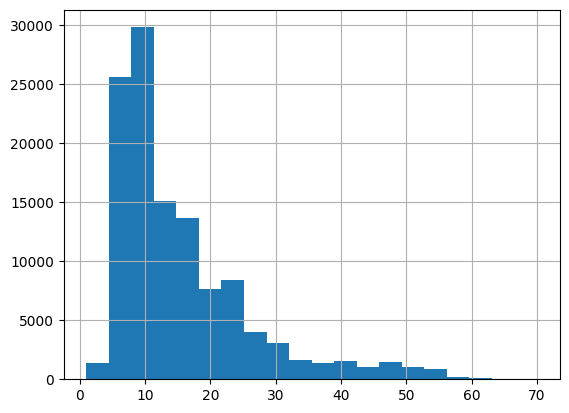

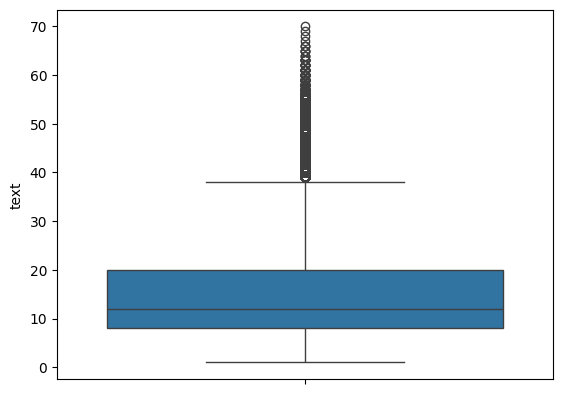

In [25]:
plt.figure()
ser.hist(bins=20)
plt.figure()
sns.boxplot(ser)

In [116]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [118]:
stopwords_arabic = set(stopwords.words('arabic'))
stopwords_arabic

{'ء',
 'ءَ',
 'آ',
 'آب',
 'آذار',
 'آض',
 'آمينَ',
 'آناء',
 'آنفا',
 'آه',
 'آها',
 'آهاً',
 'آهٍ',
 'آهِ',
 'آي',
 'أ',
 'أبدا',
 'أبريل',
 'أبو',
 'أبٌ',
 'أجل',
 'أجمع',
 'أحد',
 'أخبر',
 'أخذ',
 'أخو',
 'أخٌ',
 'أربع',
 'أربعاء',
 'أربعة',
 'أربعمئة',
 'أربعمائة',
 'أرى',
 'أسكن',
 'أصبح',
 'أصلا',
 'أضحى',
 'أطعم',
 'أعطى',
 'أعلم',
 'أغسطس',
 'أف',
 'أفريل',
 'أفعل به',
 'أفٍّ',
 'أقبل',
 'أقل',
 'أكتوبر',
 'أكثر',
 'أل',
 'ألا',
 'ألف',
 'ألفى',
 'أم',
 'أما',
 'أمام',
 'أمامك',
 'أمامكَ',
 'أمد',
 'أمس',
 'أمسى',
 'أمّا',
 'أن',
 'أنا',
 'أنبأ',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'أنتِ',
 'أنشأ',
 'أنى',
 'أنًّ',
 'أنّى',
 'أهلا',
 'أو',
 'أوت',
 'أوشك',
 'أول',
 'أولئك',
 'أولاء',
 'أولالك',
 'أوه',
 'أوّهْ',
 'أى',
 'أي',
 'أيا',
 'أيار',
 'أيضا',
 'أيلول',
 'أين',
 'أينما',
 'أيها',
 'أيّ',
 'أيّان',
 'أُفٍّ',
 'ؤ',
 'إحدى',
 'إذ',
 'إذا',
 'إذاً',
 'إذما',
 'إذن',
 'إزاء',
 'إلا',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'إليكنّ',
 'إليكَ',
 'إلَيْكَ',
 'إلّا',


In [258]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stopwords_arabic = set(stopwords.words('arabic'))

    def fit(self, X, y=None):
        # Add code for fitting the transformer here
        return self

    def transform(self, X):
        transformed_X = X.copy()
        transformed_X = X.apply(self.clean_txt)
        return transformed_X

    def clean_txt(self, text):
        # Remove URLs
        text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', text)

        # Remove usernames starting with @
        text = re.sub(r'@[\w_]+', ' ', text)

        # Remove English words
        text = re.sub(r'\b[a-zA-Z]+\b', ' ', text)

        # Remove emojis
        text = re.sub(r'[\U00010000-\U0010ffff]', ' ', text)
        text = re.sub(r':[a-z_]+:', ' ', text)

        # Remove special characters
        text = re.sub('[*?!#@]', ' ', text)

        # Remove redundant percentage and bar lines
        text = re.sub(r'\|\|+\s*\d+%\s*\|\|+?[_\-\.\?]+', ' ', text)

        text = re.sub(r'[_\-\.\"\:\;\,\'\،\♡\\\)/(\&\؟]', ' ', text)

        # Remove digits
        text = re.sub(r'\d+', ' ', text)

        text_tokens = text.split()

        # filtered_text = [word for word in text_tokens if word not in self.stopwords_arabic]
        filtered_text = text_tokens
        # Split and rejoin
        text = ' '.join(filtered_text)

        return text

    def fit_transform(self, X, y=None):
        # This function combines fit and transform
        self.fit(X, y)
        return self.transform(X)

In [259]:
pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer())])

In [260]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing', CustomTransformer())])

In [261]:
train['clean_text'] = pipeline.fit_transform(train['text'])

In [262]:
train.head(500)

,text,dialect,clean_text
0,- معايا مناسبة عايز اروحها \n\nحباية فى وشى * https://t.co/boy2wXLQo6,EG,معايا مناسبة عايز اروحها حباية فى وشى
1,@Rooka25 مش انتى كاتبه بتيسطروا ازاى \nب ٣ حاجات دى,EG,مش انتى كاتبه بتيسطروا ازاى ب حاجات دى
2,@eslamalmgrbe الف لا لاس عليها وربي يشفيها ويطول عمرها,LY,الف لا لاس عليها وربي يشفيها ويطول عمرها
3,@Dalia_PT ده بيبقى سلام بارد ومؤقت وخصوصآ لما بيبقى بينهم أولاد,EG,ده بيبقى سلام بارد ومؤقت وخصوصآ لما بيبقى بينهم أولاد
4,@A_Almahmoudy بيت شعر مش حكمة يا حكيه 😂,LY,بيت شعر مش حكمة يا حكيه
5,@monmon_29__ @EveElmasry @Tempest297 المهم انهم محرمين انها تتعرى بمزاجها انما واحد يعريها زي البقرة غصب عنها عشان يشتريها فده حلال وفل الفل,EG,المهم انهم محرمين انها تتعرى بمزاجها انما واحد يعريها زي البقرة غصب عنها عشان يشتريها فده حلال وفل الفل
6,@Dr_Wessam ده فطار مفتخر بقى .. الحقني بيه,EG,ده فطار مفتخر بقى الحقني بيه
7,"في 2005 تخرجت من الهندسة وتعرضت لنفس الوضع, طبعا هو موضوع متأصل خاصة في طلبة السكن الجامعي اللي مكونين ما يشبه الاخوية وليها قوانين خاصة لا يمكنك الاعتراض عليها. وعموما لما يكون جمهور متخرجين او حتى دكاترة فان افعالهم لا تمتل الاراء الفردية وتعامل ككتلة متحركة صعب التكهن بافعالها https://t.co/80461Q6JI8",LY,في تخرجت من الهندسة وتعرضت لنفس الوضع طبعا هو موضوع متأصل خاصة في طلبة السكن الجامعي اللي مكونين ما يشبه الاخوية وليها قوانين خاصة لا يمكنك الاعتراض عليها وعموما لما يكون جمهور متخرجين او حتى دكاترة فان افعالهم لا تمتل الاراء الفردية وتعامل ككتلة متحركة صعب التكهن بافعالها
8,#شفيق_باع_نفسه_للجزيرة\nشفيق على قنوات الإخوان طلع مظلووم ومهدور حقه \nوبيقولوا هنقف جنبه لأننا مظلومين زي بعض \nآخر نكته 😂😂😂😂,EG,شفيق باع نفسه للجزيرة شفيق على قنوات الإخوان طلع مظلووم ومهدور حقه وبيقولوا هنقف جنبه لأننا مظلومين زي بعض آخر نكته
9,@Dr_rame7 صدق الاثنين الاثنين صح .,EG,صدق الاثنين الاثنين صح


In [263]:
ser = train['clean_text'].apply(lambda x: len(x.split()))
ser.describe()

count    118180.000000
mean         13.931359
std          10.517244
min           3.000000
25%           6.000000
50%          10.000000
75%          18.000000
max          65.000000
Name: clean_text, dtype: float64

<Axes: ylabel='clean_text'>

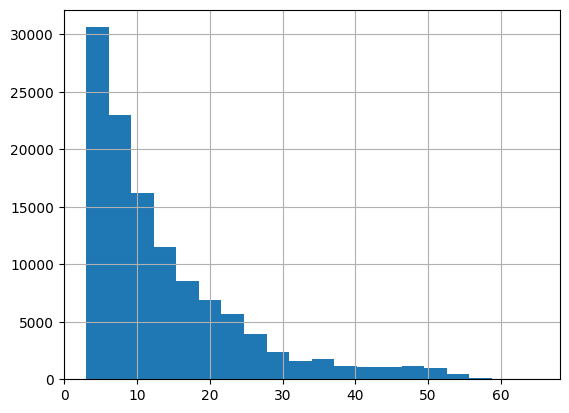

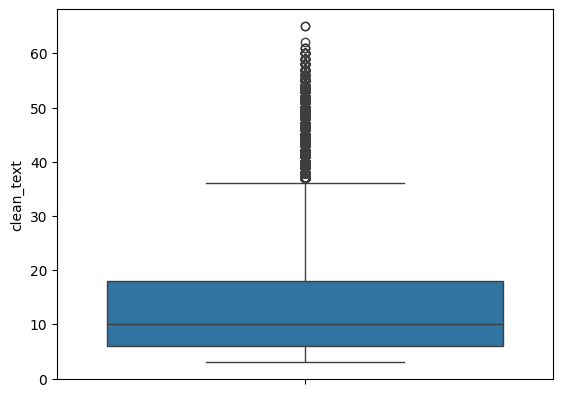

In [264]:
plt.figure()
ser.hist(bins=20)
plt.figure()
sns.boxplot(ser)